In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import scienceplots
import matplotlib.font_manager as fm
import matplotlib as mpl
import shapely.geometry as sgeom
from matplotlib.patches import Patch

In [2]:
plt.style.use(['ieee', 'retro'])
plt.rc('font', family='Arial')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# ------------------- Albedo -------------------
bsa_urb = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/data/Urban_Black_Sky_Albedo_sim_Urb_Veg_GSWP3_Albedo_bsa.nc')
bsa_salb= xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/data/Urban_Black_Sky_Albedo_sim_Slab_GSWP3_Albedo_bsa.nc')
bsa_ds  = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/data/Urban_Black_Sky_Albedo_ref_MCD43A3_Albedo_bsa.nc')

wsa_urb = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/data/Urban_White_Sky_Albedo_sim_Urb_Veg_GSWP3_Albedo_wsa.nc')
wsa_salb= xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/data/Urban_White_Sky_Albedo_sim_Slab_GSWP3_Albedo_wsa.nc')
wsa_ds  = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/data/Urban_White_Sky_Albedo_ref_MCD43A3_Albedo_wsa.nc')

slab_ob1= xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/scores/Urban_Black_Sky_Albedo_ref_MCD43A3_sim_Slab_GSWP3_Overall_Score.nc')
urb_ob1 = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/scores/Urban_Black_Sky_Albedo_ref_MCD43A3_sim_Urb_Veg_GSWP3_Overall_Score.nc')
slab_ob2= xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/scores/Urban_White_Sky_Albedo_ref_MCD43A3_sim_Slab_GSWP3_Overall_Score.nc')
urb_ob2 = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_alb/output/scores/Urban_White_Sky_Albedo_ref_MCD43A3_sim_Urb_Veg_GSWP3_Overall_Score.nc')

bsa_mean1= bsa_urb ['Albedo_bsa'].mean(dim='time')
bsa_mean2= bsa_salb['Albedo_bsa'].mean(dim='time')
bsa_mean = bsa_ds  ['Albedo_bsa'].mean(dim='time')

lon = bsa_mean1['lon'][:].values
lat = bsa_mean1['lat'][:].values
lon2d, lat2d = np.meshgrid(lon, lat)

bsa_bias1 = bsa_mean1 - bsa_mean
bsa_bias2 = bsa_mean2 - bsa_mean

wsa_mean1= wsa_urb ['Albedo_wsa'].mean(dim='time')
was_mena2= wsa_salb['Albedo_wsa'].mean(dim='time')
wsa_mean = wsa_ds  ['Albedo_wsa'].mean(dim='time')

wsa_bias1 = wsa_mean1 - wsa_mean
wsa_bias2 = was_mena2 - wsa_mean

all_bias1 = np.concatenate([
    bsa_bias1.values.flatten(),
    bsa_bias2.values.flatten()
])
vmin1, vmax1 = -0.2, 0.2

all_bias2 = np.concatenate([
    wsa_bias1.values.flatten(),
    wsa_bias2.values.flatten()
])
vmin2, vmax2 = -0.3, 0.3

urb_score1 = urb_ob1 ['Overall_Score']
slab_score1= slab_ob1['Overall_Score']
urb_score2 = urb_ob2 ['Overall_Score']
slab_score2= slab_ob2['Overall_Score']

comp1 = np.where(
    np.abs(urb_score1) > np.abs(slab_score1),  1,
    np.where(np.abs(urb_score1) < np.abs(slab_score1), -1, 0)
)
comp2 = np.where(
    np.abs(urb_score2) > np.abs(slab_score2),  1,
    np.where(np.abs(urb_score2) < np.abs(slab_score2), -1, 0)
)

cmp_cmap = mpl.colors.ListedColormap([
    'red',
    (0, 0, 0, 0),
    'green'
])
cmp_norm = mpl.colors.BoundaryNorm([-0.2, -0.1, 0.1, 0.2], cmp_cmap.N)

In [4]:
#---------------------LE--------------------------------
le_urb = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_LE/output/data/Urban_Latent_Heat_Flux_sim_Urb_Veg_GSWP3_f_lfevpa.nc')
le_slab= xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_LE/output/data/Urban_Latent_Heat_Flux_sim_Slab_GSWP3_f_lfevpa.nc')
le_ds = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_LE/output/data/Urban_Latent_Heat_Flux_ref_ETMonitor_LE.nc')

slab_ob = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_LE/output/scores/Urban_Latent_Heat_Flux_ref_ETMonitor_sim_Slab_GSWP3_Overall_Score.nc')
urb_ob  = xr.open_dataset(f'/tera12/yuanhua/dongwz/github/OpenBench/output/CoLM-UBCM_LE/output/scores/Urban_Latent_Heat_Flux_ref_ETMonitor_sim_Urb_Veg_GSWP3_Overall_Score.nc')

le_mean1 = le_urb ['f_lfevpa'].mean(dim='time')
le_mean2 = le_slab['f_lfevpa'].mean(dim='time')
le_mean  = le_ds  ['LE'].mean(dim='time')

le_bias1= le_mean1 - le_mean
le_bias2= le_mean2 - le_mean

urb_score3 = urb_ob ['Overall_Score']
slab_score3= slab_ob['Overall_Score']

comp3 = np.where(
    np.abs(urb_score3) > np.abs(slab_score3),  1,
    np.where(np.abs(urb_score3) < np.abs(slab_score3), -1, 0)
)
vmin3, vmax3 = -20, 20
#-------------------------------------------------------

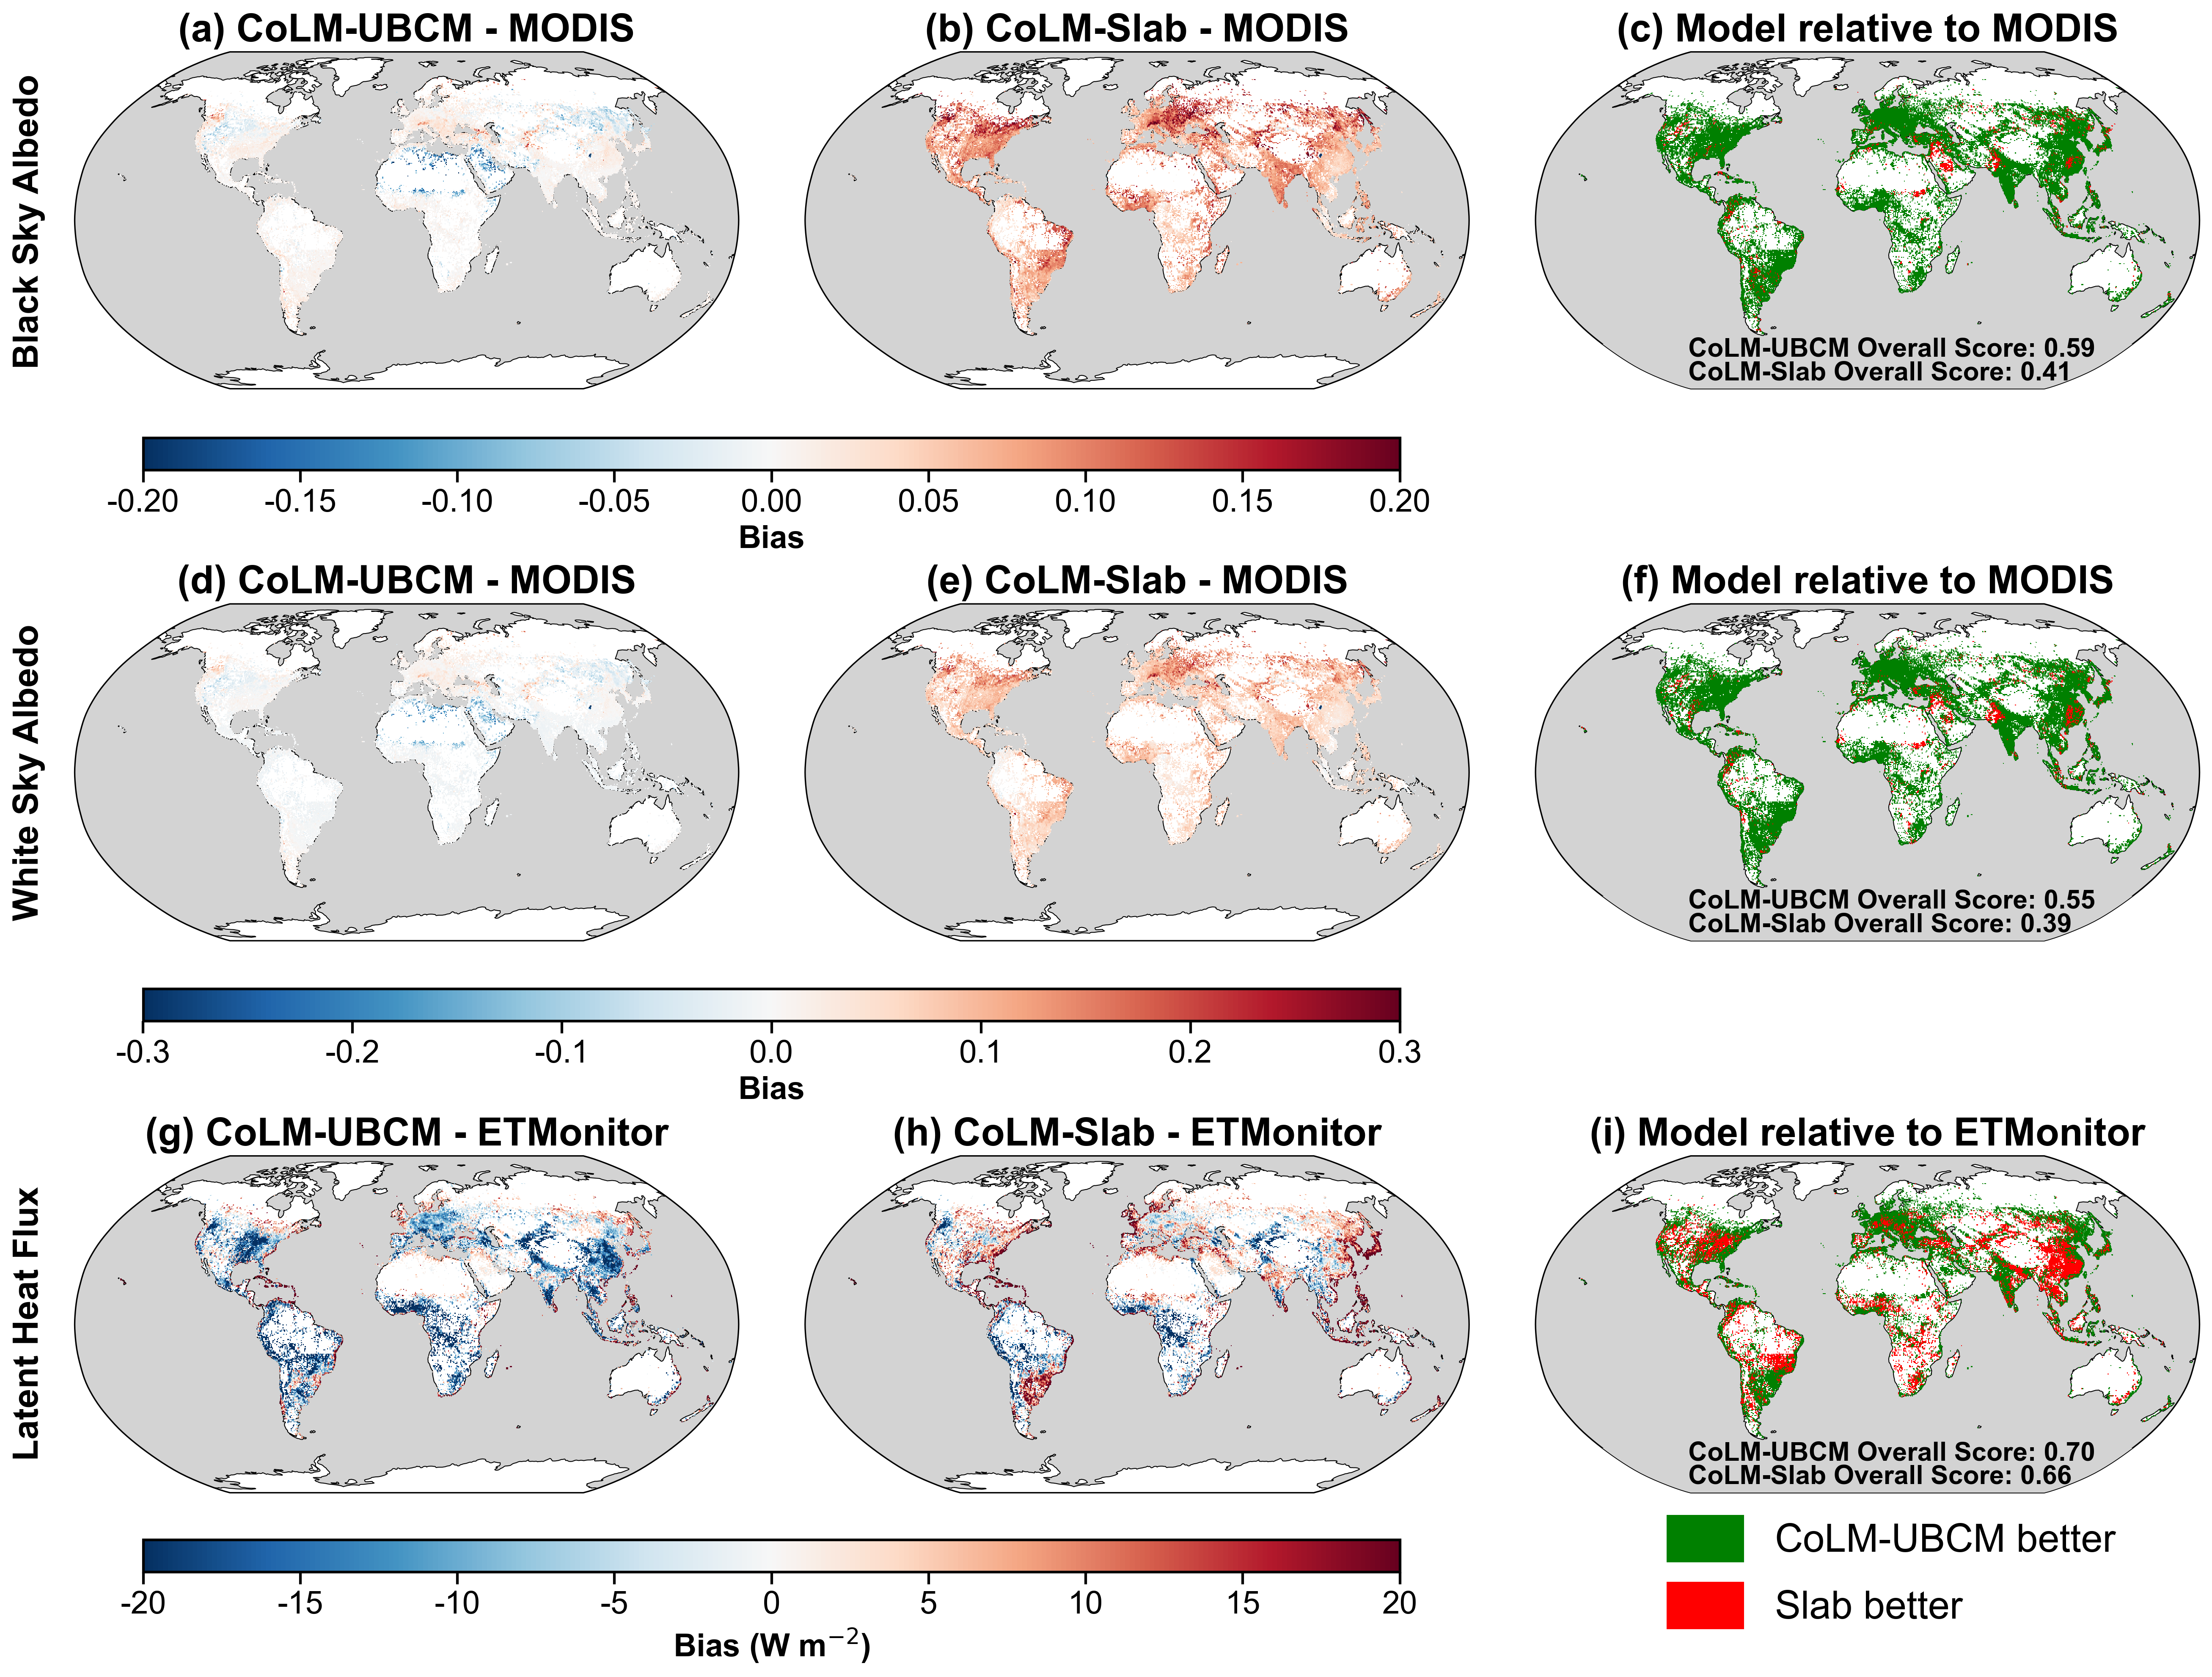

In [ ]:
# Plot
fig = plt.figure(figsize=(18, 14), dpi=300)

antarctic = sgeom.Polygon([
    (-180, -90),
    ( 180, -90),
    ( 180, -60),
    (-180, -60)
])
proj = ccrs.Robinson()

for i in range(9):
    ax = fig.add_subplot(331 + i, projection=proj)

    if i != 2 and i != 5 and i!=8:

        if i==0:
            bias = bsa_bias1
            vmin, vmax = vmin1, vmax1
            sub_title = '(a) CoLM-UBCM - MODIS'
        elif i==1:
            bias = bsa_bias2
            vmin, vmax = vmin1, vmax1
            sub_title = '(b) CoLM-Slab - MODIS'
        elif i==3:
            bias = wsa_bias1
            vmin, vmax = vmin2, vmax2
            sub_title = '(d) CoLM-UBCM - MODIS'
        elif i==4:
            bias = wsa_bias2
            vmin, vmax = vmin2, vmax2
            sub_title = '(e) CoLM-Slab - MODIS'
        elif i==6:
            bias = le_bias1
            vmin, vmax = vmin3, vmax3
            sub_title = '(g) CoLM-UBCM - ETMonitor'
        elif i==7:
            bias = le_bias2
            vmin, vmax = vmin3, vmax3
            sub_title = '(h) CoLM-Slab - ETMonitor'

        ax.set_global()
        ax.add_feature(cfeature.OCEAN, facecolor='lightgray')
        ax.add_feature(cfeature.LAND,  facecolor='white', edgecolor='black', linewidth=0.5)

        if i==0:
            im0 = ax.pcolormesh(
                lon2d, lat2d, bias,
                transform=ccrs.PlateCarree(),
                cmap='RdBu_r', vmin=vmin, vmax=vmax)
        elif i==3:
            im1 = ax.pcolormesh(
                lon2d, lat2d, bias,
                transform=ccrs.PlateCarree(),
                cmap='RdBu_r', vmin=vmin, vmax=vmax)
        elif i==6:
            im2 = ax.pcolormesh(
                lon2d, lat2d, bias,
                transform=ccrs.PlateCarree(),
                cmap='RdBu_r', vmin=vmin, vmax=vmax)
        else:
            im = ax.pcolormesh(
                lon2d, lat2d, bias,
                transform=ccrs.PlateCarree(),
                cmap='RdBu_r', vmin=vmin, vmax=vmax)


        ax.set_title(sub_title, loc='center', fontsize=22, pad=6, weight='bold')
    else:
        ax.set_global()
        ax.add_feature(cfeature.OCEAN, facecolor='lightgray')
        ax.add_feature(cfeature.LAND,  facecolor='white', edgecolor='black', linewidth=0.5)

        if i==2:
            comp = comp1
            sub_title = '(c) Model relative to MODIS'
            score1 = 'CoLM-UBCM Overall Score: 0.59'
            score2 = 'CoLM-Slab Overall Score: 0.41'
        elif i==5:
            comp = comp2
            sub_title = '(f) Model relative to MODIS'
            score1 = 'CoLM-UBCM Overall Score: 0.55'
            score2 = 'CoLM-Slab Overall Score: 0.39'
        elif i==8:
            comp = comp3
            sub_title = '(i) Model relative to ETMonitor'
            score1 = 'CoLM-UBCM Overall Score: 0.70'
            score2 = 'CoLM-Slab Overall Score: 0.66'


        im = ax.pcolormesh(
            lon2d, lat2d, comp,
            transform=ccrs.PlateCarree(),
            cmap=cmp_cmap, norm=cmp_norm,
            zorder=1
        )
        ax.add_geometries(
            [antarctic],
            crs=ccrs.PlateCarree(),
            facecolor='lightgray',
            edgecolor='none',
            zorder=3
        )

        x_base = 0.23
        ax.text(
            x_base, 0.08, score1,
            transform=ax.transAxes,
            ha='left', va='bottom',
            color='black', fontsize=15, zorder=10, weight='bold'
        )
        ax.text(
            x_base, 0.01, score2,
            transform=ax.transAxes,
            ha='left', va='bottom',
            color='black', fontsize=15, zorder=10, weight='bold'
        )

        ax.set_title(sub_title, loc='center', fontsize=22, pad=6, weight='bold')

#Albedo
cbar_ax = fig.add_axes([0.08, 0.71, 0.55, 0.018])
cb = fig.colorbar(im0, cax=cbar_ax, orientation='horizontal')
cb.set_label('Bias', fontsize=18, weight='bold')
cb.ax.tick_params(labelsize=18)

cb.ax.tick_params(axis='x', which='major', length=7, width=1.5, labelsize=18)
cb.ax.tick_params(axis='x', which='minor', length=0, width=0)
cb.outline.set_linewidth(1.5)

cbar_ax = fig.add_axes([0.08, 0.4, 0.55, 0.018])
cb = fig.colorbar(im1, cax=cbar_ax, orientation='horizontal')
cb.set_label('Bias', fontsize=18, weight='bold')
cb.ax.tick_params(labelsize=18)

cb.ax.tick_params(axis='x', which='major', length=7, width=1.5, labelsize=18)
cb.ax.tick_params(axis='x', which='minor', length=0, width=0)
cb.outline.set_linewidth(1.5)

#LE
cbar_ax = fig.add_axes([0.08, 0.09, 0.55, 0.018])
cb = fig.colorbar(im2, cax=cbar_ax, orientation='horizontal')
cb.set_label('Bias (W m$^{-2}$)', fontsize=18, weight='bold')
cb.ax.tick_params(labelsize=18)
cb.ax.tick_params(axis='x', which='major', length=7, width=1.5, labelsize=18)
cb.ax.tick_params(axis='x', which='minor', length=0, width=0)
cb.outline.set_linewidth(1.5)

legend_ax = fig.add_axes([0.72, 0.06, 0.25, 0.06])
legend_ax.axis('off')
legend_ax.legend(
    [Patch(facecolor='green'), Patch(facecolor='red')],
    ['CoLM-UBCM better', 'Slab better'],
    loc='center', ncol=1, frameon=False, fontsize=22, handleheight=1.5
)

fig.text(0.03, 0.85, 'Black Sky Albedo',
         ha='center', va='center', rotation='vertical', fontsize=20, weight='bold')

fig.text(0.03, 0.54, 'White Sky Albedo',
         ha='center', va='center', rotation='vertical', fontsize=20, weight='bold')

fig.text(0.03, 0.23, 'Latent Heat Flux',
         ha='center', va='center', rotation='vertical', fontsize=20, weight='bold')
fig.subplots_adjust(hspace=0.2,
                    wspace=0.1,
                    left=0.05,
                    right=0.98,
                    top=0.98,
                    bottom=0.1)
# plt.suptitle('Global Albedo Bias and Improvement (2003–2013)', fontsize=18, y=0.92)
# fig.subplots_adjust(hspace=0.0005)
plt.savefig('Figure18.jpg', dpi=300)
plt.show()